# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# **Load DataSet**

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Intro Data**

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Univariate**

,Survived,Age
0,0,424
1,1,290


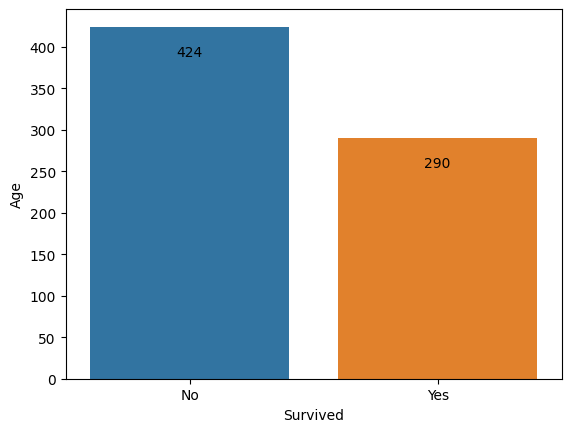

In [ ]:
Survival = df.groupby(['Survived'])['Age'].count().reset_index()
display(Survival)
sns.barplot(x=Survival['Survived'], y=Survival['Age'])
for i in Survival['Survived']:
    plt.text(i, Survival['Age'][i] - 35,Survival['Age'][i], ha='center')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
df.dropna(subset = ['Age']).groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

,Survived,PassengerId
0,0,549
1,1,342


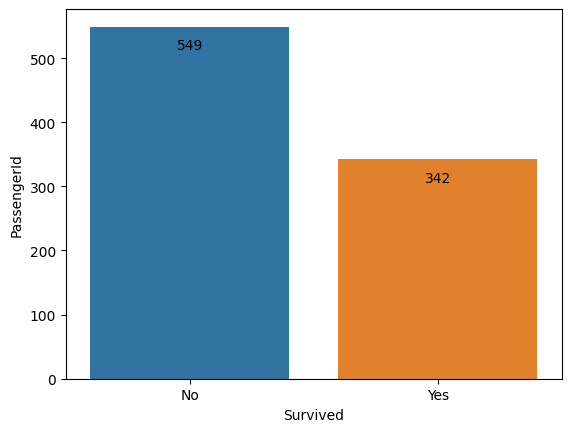

In [ ]:
Survival = df.groupby(['Survived'])['PassengerId'].count().reset_index()
display(Survival)
sns.barplot(x=Survival['Survived'], y=Survival['PassengerId'])
for i in Survival['Survived']:
    plt.text(i, Survival['PassengerId'][i] - 35,Survival['PassengerId'][i], ha='center')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
df.dropna(subset = ['PassengerId']).groupby('Survived')['PassengerId'].mean()

Survived
0    447.016393
1    444.368421
Name: PassengerId, dtype: float64

,Survived,Embarked
0,0,549
1,1,340


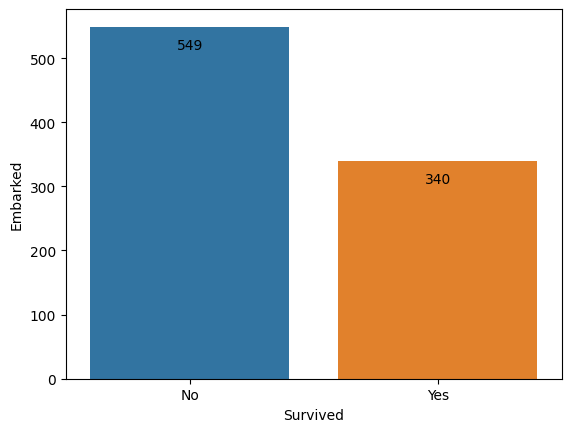

In [ ]:
Survival = df.groupby(['Survived'])['Embarked'].count().reset_index()
display(Survival)
sns.barplot(x=Survival['Survived'], y=Survival['Embarked'])
for i in Survival['Survived']:
    plt.text(i, Survival['Embarked'][i] - 35,Survival['Embarked'][i], ha='center')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

,Survived,Fare
0,0,549
1,1,342


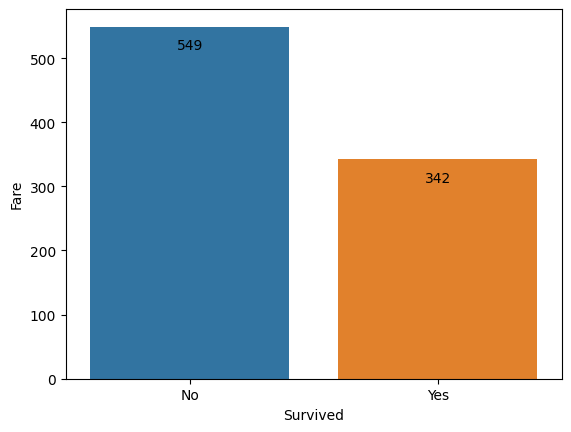

In [ ]:
Survival = df.groupby(['Survived'])['Fare'].count().reset_index()
display(Survival)
sns.barplot(x=Survival['Survived'], y=Survival['Fare'])
for i in Survival['Survived']:
    plt.text(i, Survival['Fare'][i] - 35,Survival['Fare'][i], ha='center')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
#titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
#titanic_test.head(5)

In [ ]:
#titanic_test.info()

In [ ]:
#titanic_test.describe()

In [ ]:
#titanic_test.describe()

In [ ]:
#titanic_test.columns

In [ ]:
survived_count=df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

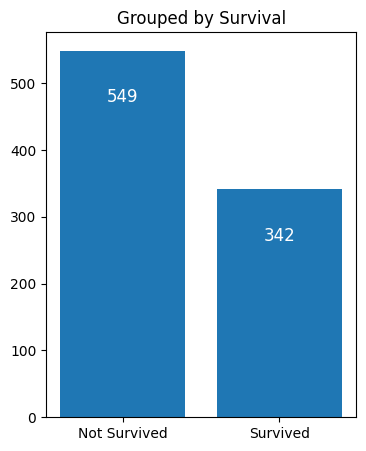

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by Survival')
plt.xticks([0,1], ['Not Survived', 'Survived'])

for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='center')
plt.show()

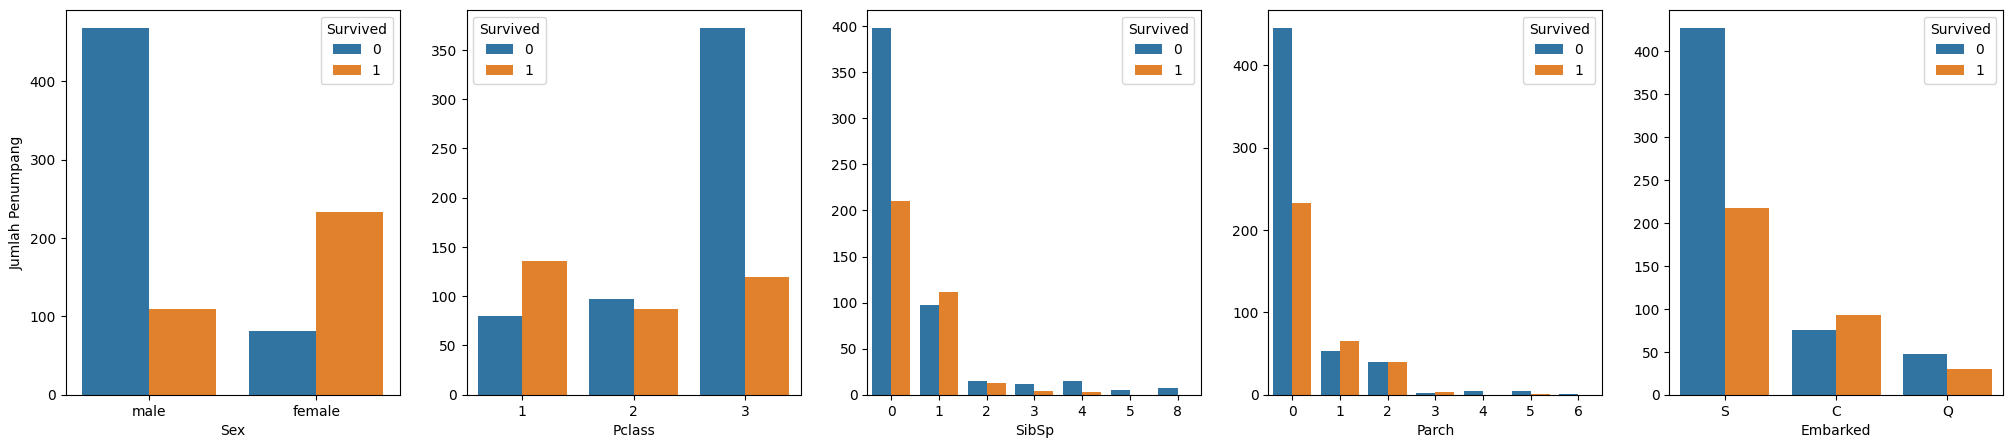

In [ ]:
list1 = ['Sex','Pclass', 'SibSp', 'Parch', 'Embarked']

fig, ax = plt.subplots(1,len(list1), figsize=(5*len(list1),5))
for i in range(0,len(list1)):
    sns.countplot(x=df[list1[i]], hue=df['Survived'], ax=ax[i])
    ax[i].set_ylabel('')
    ax[0].set_ylabel('Jumlah Penumpang')


# **Name**

In [ ]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
import re
nama = 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
#title = re.search(' [A-Z][a-z]+\.', nama)
title = re.search(' [A-Z][a-z]{1,}\.', nama).group()
title

' Mrs.'

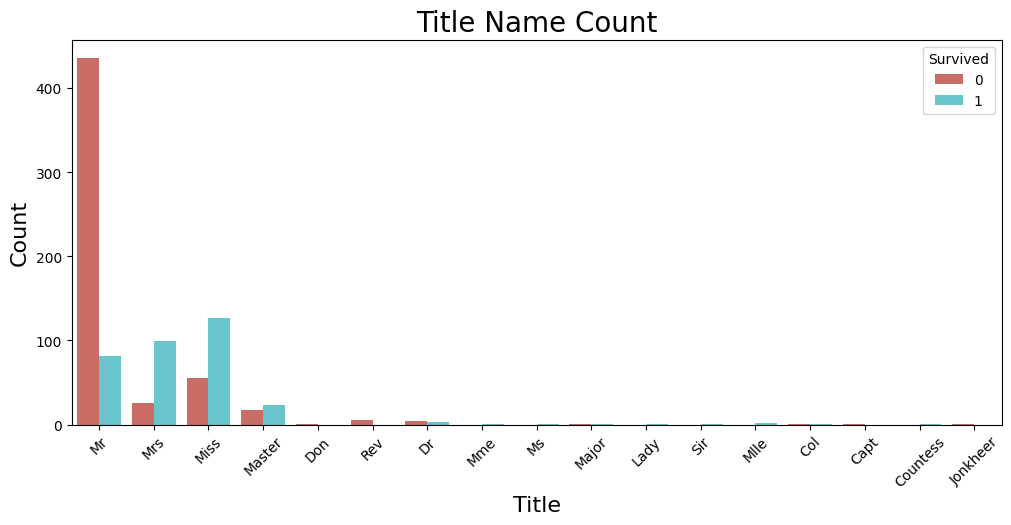

In [ ]:
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

plt.figure(figsize = (12, 5))

sns.countplot(data = df, x = 'Title', hue = 'Survived', palette = "hls")
plt.xlabel("Title", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Title Name Count", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Now, I will identify the social status of each title

Title_Dictionary = {
    "Capt":         "Officer",
    "Col":          "Officer",
    "Major":        "Officer",
    "Dr":           "Officer",
    "Rev":          "Officer",
    "Jonkheer":     "Royalty",
    "Don":          "Royalty",
    "Sir":          "Royalty",
    "the Countess": "Royalty",
    "Dona":         "Royalty",
    "Lady":         "Royalty",
    "Mme":          "Mrs",
    "Ms":           "Mrs",
    "Mrs":          "Mrs",
    "Mlle":         "Miss",
    "Miss":         "Miss",
    "Mr":           "Mr",
    "Master":       "Master"
}

df['Title'] = df.Title.map(Title_Dictionary)

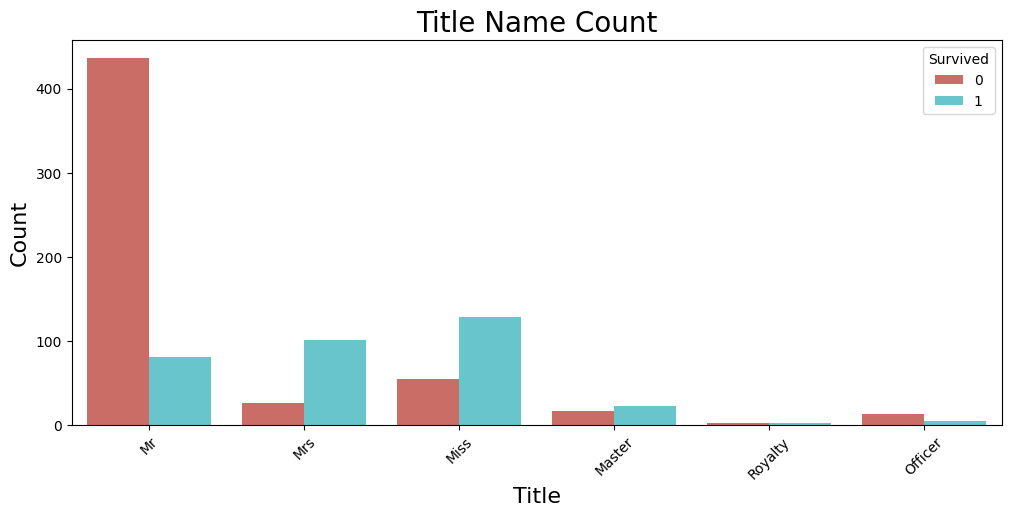

In [ ]:
plt.figure(figsize = (12, 5))
sns.countplot(data = df, x = 'Title', hue = 'Survived', palette = "hls")
plt.xlabel("Title", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Title Name Count", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

# **Age**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

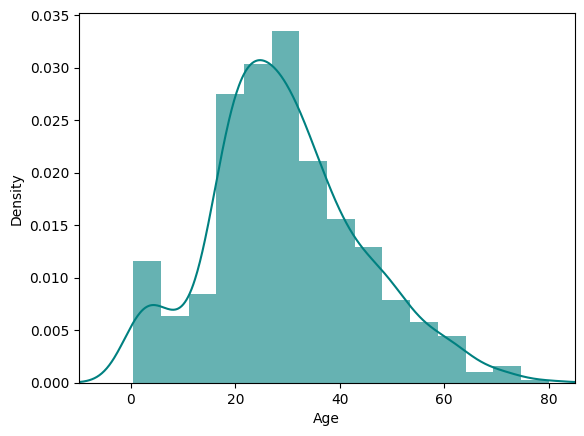

In [ ]:
#Cek Distribusi Age menggunakan fungsi Hist
ax = df["Age"].hist(bins=15, density=True, stacked=True, color="teal", alpha=0.6)
df["Age"].plot(kind="density", color="teal")
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

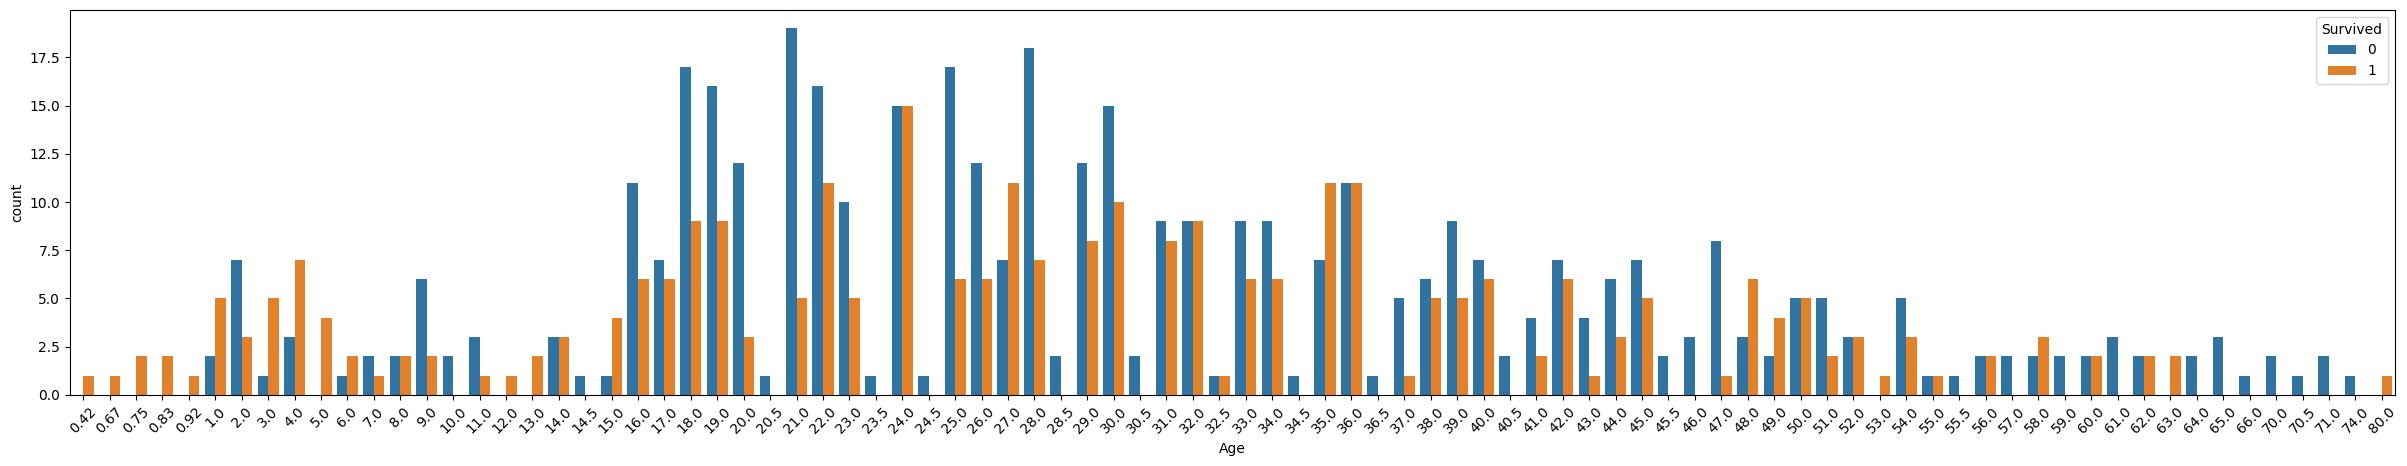

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x = df['Age'], hue=df['Survived'])
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Age (years)')

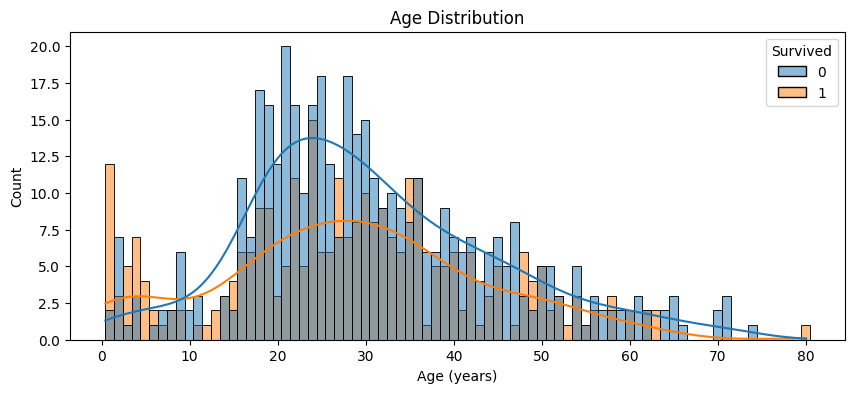

In [ ]:
# Cek Distribusi Age Menggunakan Fungsi Hist
plt.figure(figsize = (10, 4))
sns.histplot(data = df, x = 'Age', hue = 'Survived', binwidth = 1, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')

In [ ]:
#get the age data which is NOT NaN

ages = df[df['Age'].notnull()]['Age'].values

#create the data for histogram
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist

(array([ 62, 102, 220, 167,  89,  48,  19,   6,   1]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

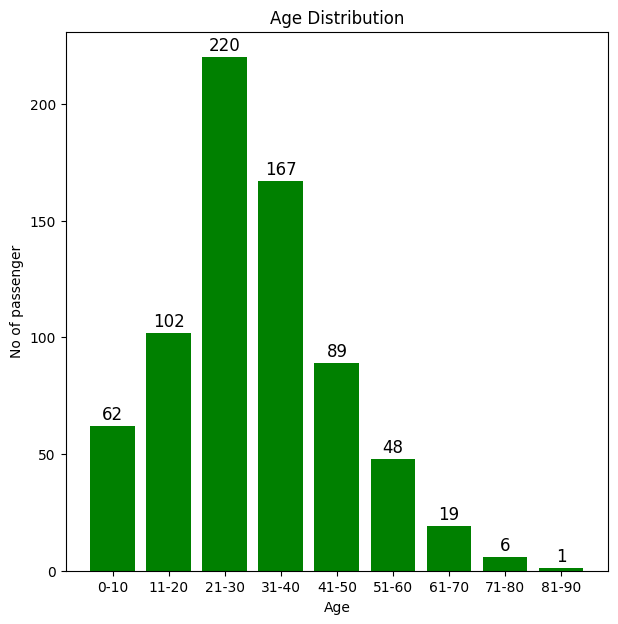

In [ ]:
# manual data labelling
ages_hist_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# create a histogram
plt.figure(figsize=(7,7))
plt.title('Age Distribution')
plt.bar(ages_hist_labels, ages_hist[0], color='Green')
plt.xlabel('Age')
plt.ylabel('No of passenger')

# add text to the bars
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+5, str(int(i)), fontsize=12, horizontalalignment='center', verticalalignment='center')

# show the plot
plt.show()

In [ ]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        890 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

<Figure size 1200x500 with 0 Axes>

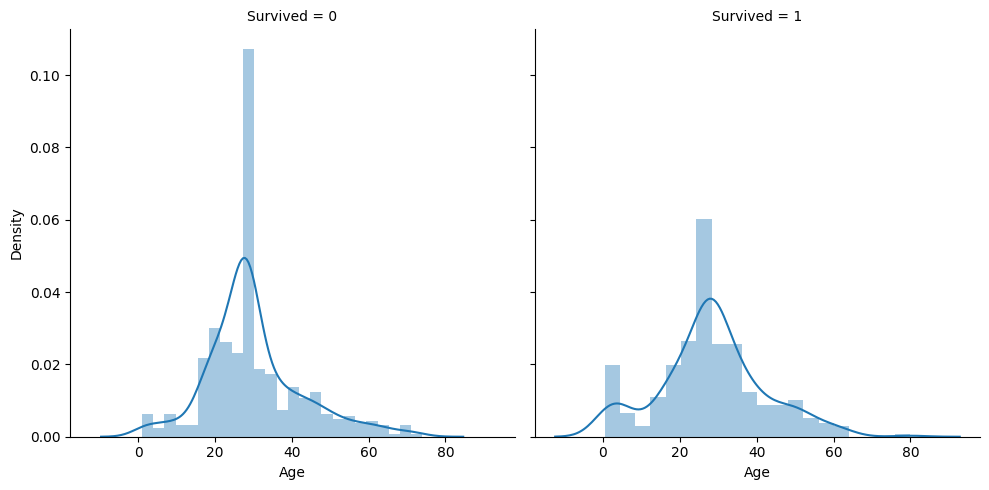

In [ ]:
plt.figure(figsize=(12,5))

# menggunakan FacetGrid, tetapi gunakan argumen 'height' alih-alih 'size'
g = sns.FacetGrid(df, col='Survived', height=5)
g = g.map(sns.distplot, "Age")
plt.show()


In [ ]:
#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#Setting the named that we want use to the categorys
cats = ['Babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created
df["Age_cat"] = pd.cut(df.Age, interval, labels = cats)

# Printing the new Category
df["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): ['Babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

Survived    0    1
Age_cat           
Babies     13   31
Children   16    9
Teen       40   30
Student   108   54
Young     238  135
Adult     117   78
Senior     17    5


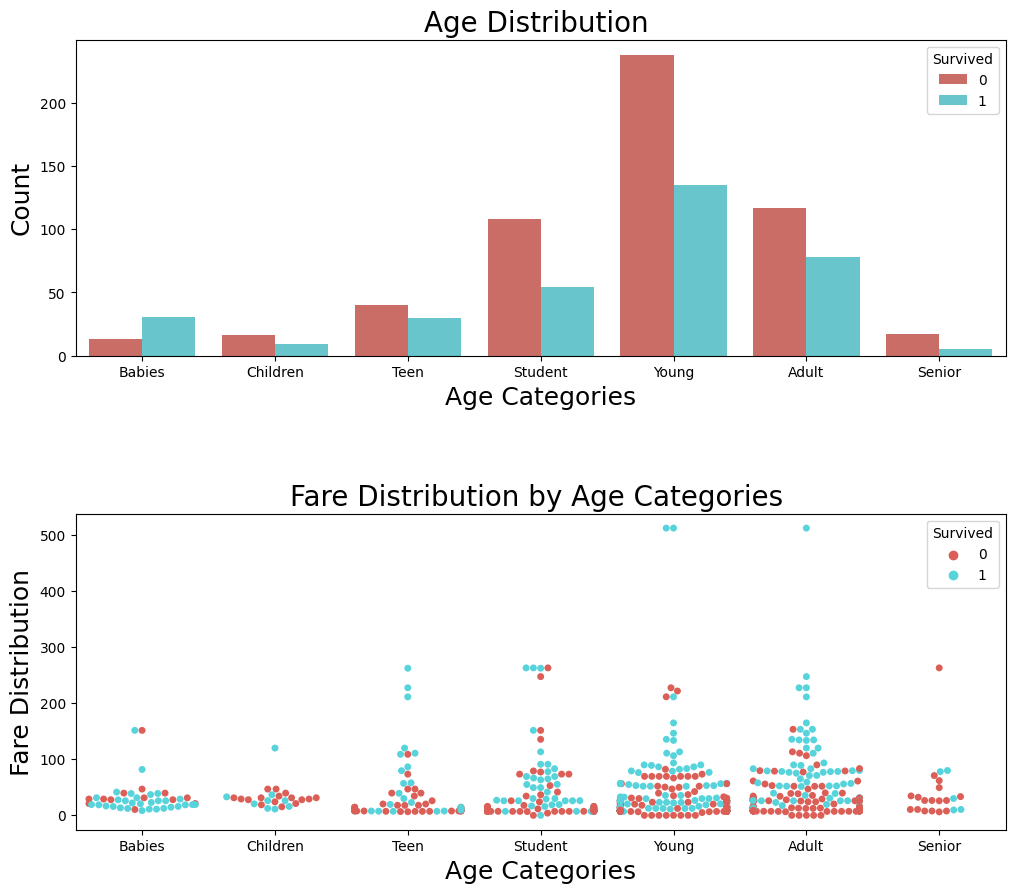

In [ ]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(df.Age_cat, df.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot(x="Age_cat",data=df, hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat', y="Fare", data=df, hue="Survived", palette="hls")
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categories", fontsize=18)
plt.title("Fare Distribution by Age Categories ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()


# **PClass**

In [ ]:
pclass_count = df['Pclass'].value_counts()
pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

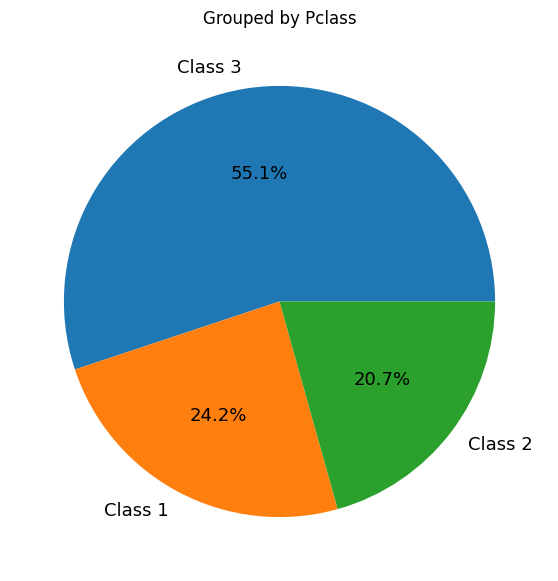

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by Pclass')
plt.pie(pclass_count.values,
        labels=['Class {}'.format(i) for i in pclass_count.index],
        autopct='%1.1f%%', textprops={'fontsize':13})

plt.show()

In [ ]:
Age_fare = ['Pclass', 'Age_cat'] #seting the desired

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[Age_fare[0]], df[Age_fare[1]],
            values=df['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
or_enc = OrdinalEncoder()
pclass_encod = or_enc.fit_transform(df[['Pclass']])
pclass_df = pd.DataFrame(pclass_encod, columns = or_enc.get_feature_names_out())
pclass_df.head()

,Pclass
0,2.0
1,0.0
2,2.0
3,0.0
4,2.0


In [ ]:
#df.drop(["Pclass"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        890 non-null    object  
 13  Age_cat      891 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.8+ KB


# **Fare**

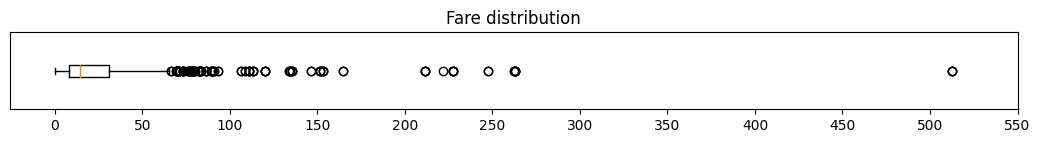

In [ ]:
#visualisasi jarak (FARE) penumpang

plt.figure(figsize=(13,1))
plt.title('Fare distribution')
plt.boxplot(df['Fare'], vert=False)
plt.yticks([])
plt.xticks(range(0,600,50))
plt.show()

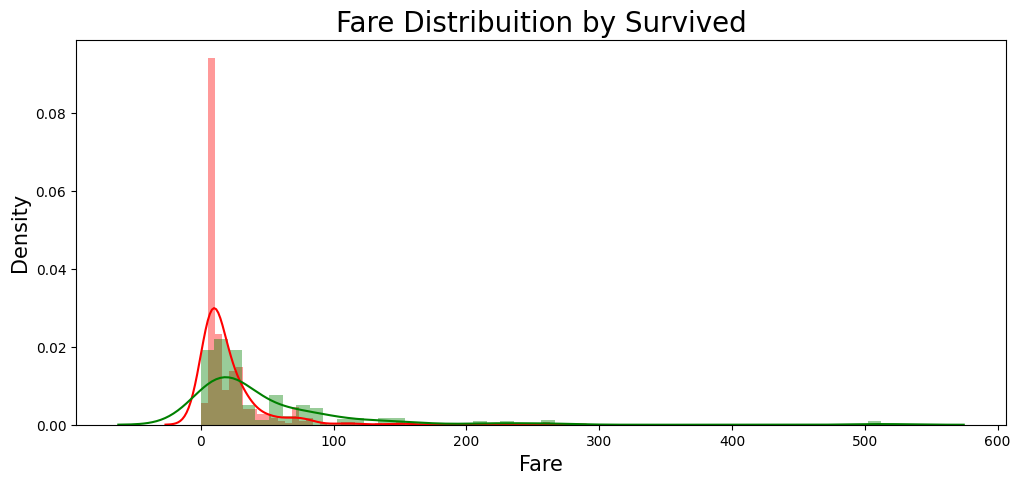

In [ ]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition
sns.distplot(df[df.Survived == 0]["Fare"],
             bins=50, color='r')
sns.distplot(df[df.Survived == 1]["Fare"],
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

In [ ]:
#Description_of_Fare_variable

#Min: 0
#Median: 14.45
#Mean: 32.20
#Max: 512.32
#Std: 49.69

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


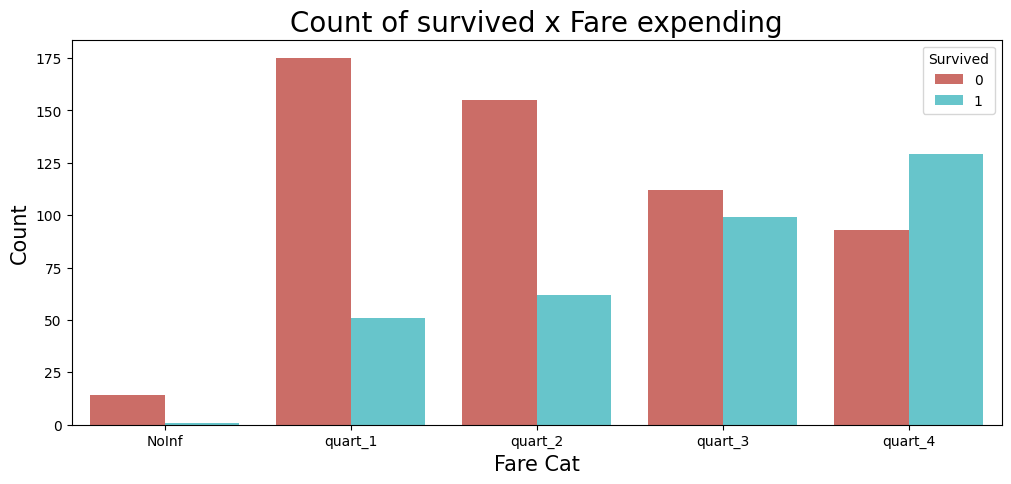

In [ ]:
#Filling the NA's with -0.5
df.Fare = df.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df["Fare_cat"] = pd.cut(df.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df.Fare_cat, df.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()

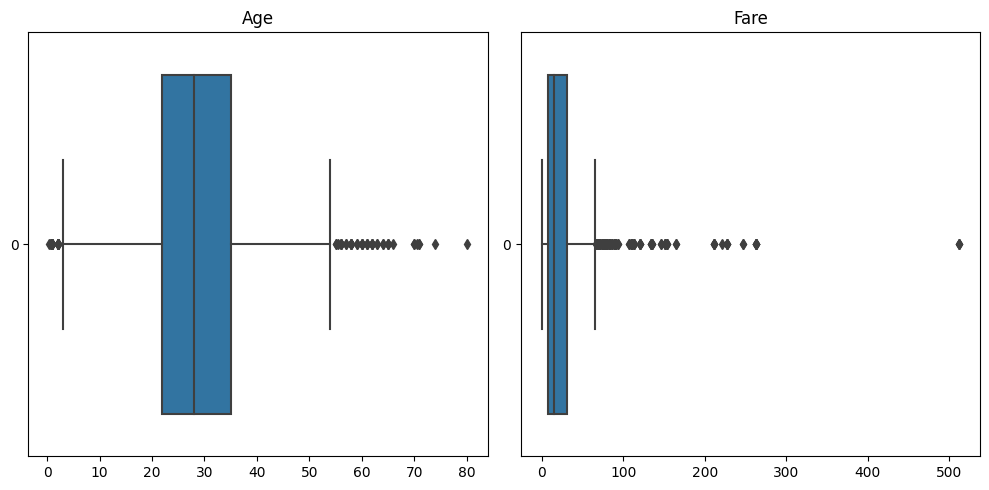

In [ ]:
list2 = ['Age', 'Fare']
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a 1x2 grid of subplots

for i in range(len(list2)):
    sns.boxplot(df[list2[i]], orient='h', ax=axes[i])
    axes[i].set_title(list2[i])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student,quart_1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult,quart_4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young,quart_1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Young,quart_4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Young,quart_2


In [ ]:
#titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1
#titanic_test[['Name','SibSp','Parch','FamilySize']]

# **Sex**

In [ ]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
survived_sex

female    233
male      109
Name: Sex, dtype: int64

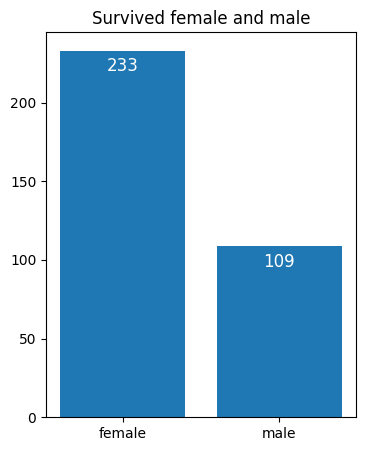

In [ ]:
#Visualisasi data jenis kelamin penumpang yang selamat

plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')

for i, value in enumerate(survived_sex.values):
    plt.text(i, value-10, str(value), fontsize=12, color='white',
            horizontalalignment='center', verticalalignment='center')
plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


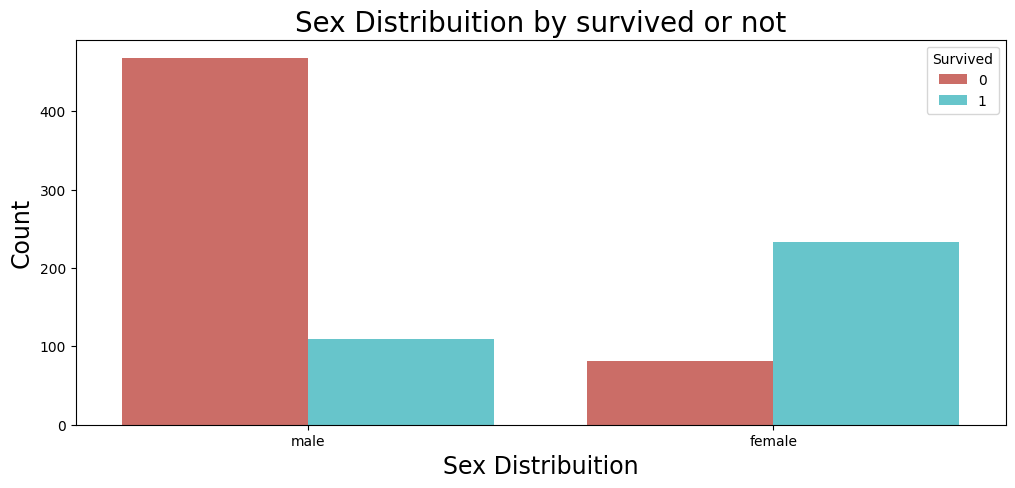

In [ ]:
print(pd.crosstab(df.Survived, df.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        890 non-null    object  
 13  Age_cat      891 non-null    category
 14  Fare_cat     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.9+ KB


In [ ]:
df.dropna(axis=0, subset=['Sex'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        890 non-null    object  
 13  Age_cat      891 non-null    category
 14  Fare_cat     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.9+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
embarked_onehot = encoder.fit_transform(df[["Sex"]]).toarray()
one_hot_df = pd.DataFrame(embarked_onehot, columns=encoder.get_feature_names_out())
one_hot_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
embarked_onehot = encoder.fit_transform(df[["Sex"]]).toarray()
one_hot_df = pd.DataFrame(embarked_onehot, columns=encoder.get_feature_names_out())
one_hot_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
df.dropna(axis=0, subset=['Sex'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        890 non-null    object  
 13  Age_cat      891 non-null    category
 14  Fare_cat     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 92.9+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
embarked_onehot = encoder.fit_transform(df[["Sex"]]).toarray()
one_hot_df = pd.DataFrame(embarked_onehot, columns=encoder.get_feature_names_out())
one_hot_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
df.drop(["Sex"], axis=1, inplace=True)
df = pd.concat([df, one_hot_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
 11  Title        890 non-null    object  
 12  Age_cat      891 non-null    category
 13  Fare_cat     891 non-null    category
 14  Sex_female   891 non-null    float64 
 15  Sex_male     891 non-null    float64 
dtypes: category(2), float64(4), int64(5), object(5)
memory usage: 99.9+ KB


# **Embarked**

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


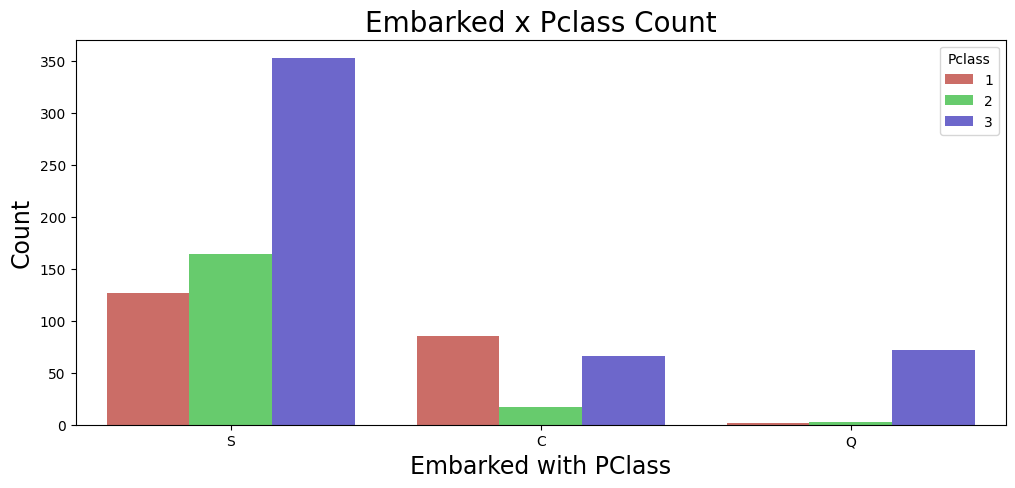

In [ ]:
# Distribuition by class
print(pd.crosstab(df.Pclass, df.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [ ]:
df.dropna(axis=0, subset=["Embarked"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Ticket       889 non-null    object  
 8   Fare         889 non-null    float64 
 9   Cabin        202 non-null    object  
 10  Embarked     889 non-null    object  
 11  Title        888 non-null    object  
 12  Age_cat      889 non-null    category
 13  Fare_cat     889 non-null    category
 14  Sex_female   889 non-null    float64 
 15  Sex_male     889 non-null    float64 
dtypes: category(2), float64(4), int64(5), object(5)
memory usage: 106.5+ KB


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


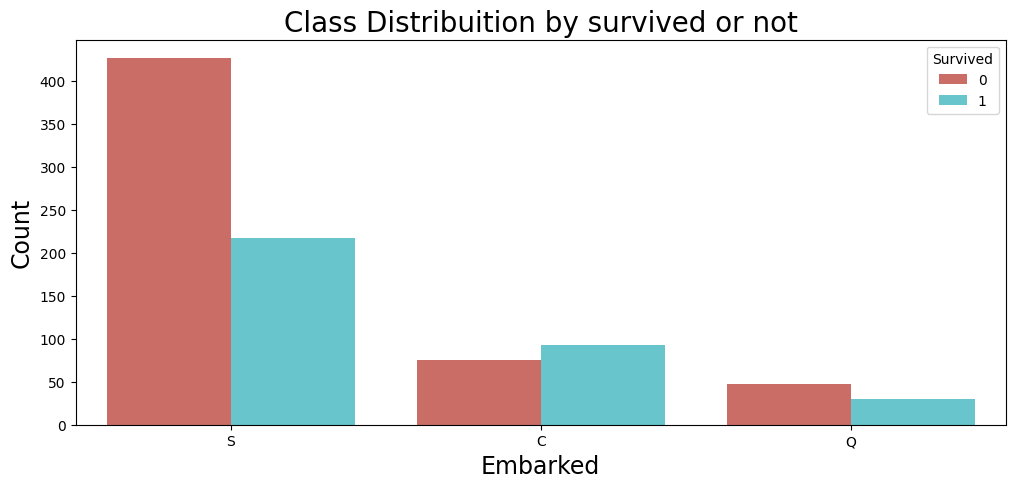

In [ ]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df.Survived, df.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#gunakan one hot encoder untuk merubah tipe data kategori nominal
encoder = OneHotEncoder()
#"Embarked"--> category tipe nominal
#df["___"]= df["__"].__("__")

embarked_onehot = encoder.fit_transform(df[["Embarked"]]).toarray()
#print(encoder.feature_names_in_)
one_hot_df = pd.DataFrame(embarked_onehot, columns=encoder.get_feature_names_out())
one_hot_df.head()
#"Sex"--> category tupe nominal

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
df.drop(["Embarked"], axis=1, inplace=True)
df = pd.concat([df, one_hot_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 829
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    float64 
 1   Survived     889 non-null    float64 
 2   Pclass       889 non-null    float64 
 3   Name         889 non-null    object  
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    float64 
 6   Parch        889 non-null    float64 
 7   Ticket       889 non-null    object  
 8   Fare         889 non-null    float64 
 9   Cabin        202 non-null    object  
 10  Title        888 non-null    object  
 11  Age_cat      889 non-null    category
 12  Fare_cat     889 non-null    category
 13  Sex_female   889 non-null    float64 
 14  Sex_male     889 non-null    float64 
 15  Embarked_C   889 non-null    float64 
 16  Embarked_Q   889 non-null    float64 
 17  Embarked_S   889 non-null    float64 
dtypes: category(2), float64(12), o

# **Family**

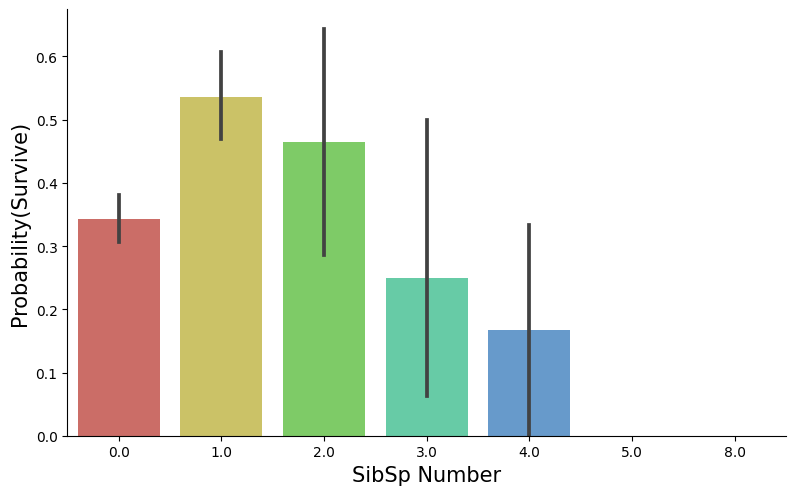

In [ ]:
g = sns.catplot(x="SibSp", y="Survived", data=df, kind="bar", height=5, aspect=1.6, palette="hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()


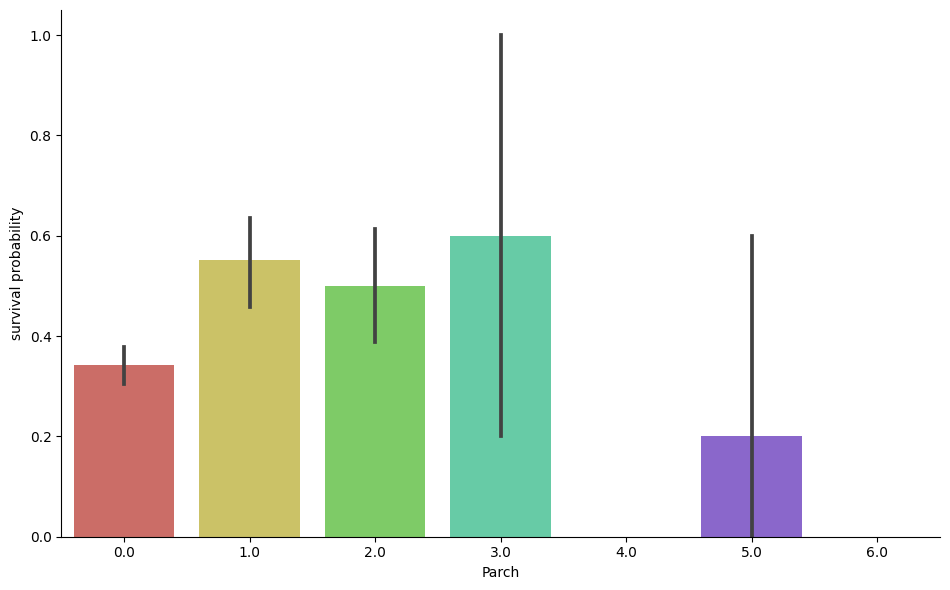

In [ ]:
g = sns.catplot(x="Parch", y="Survived", data=df, kind="bar", height=6, aspect=1.6, palette="hls")
g.set_ylabels("survival probability")


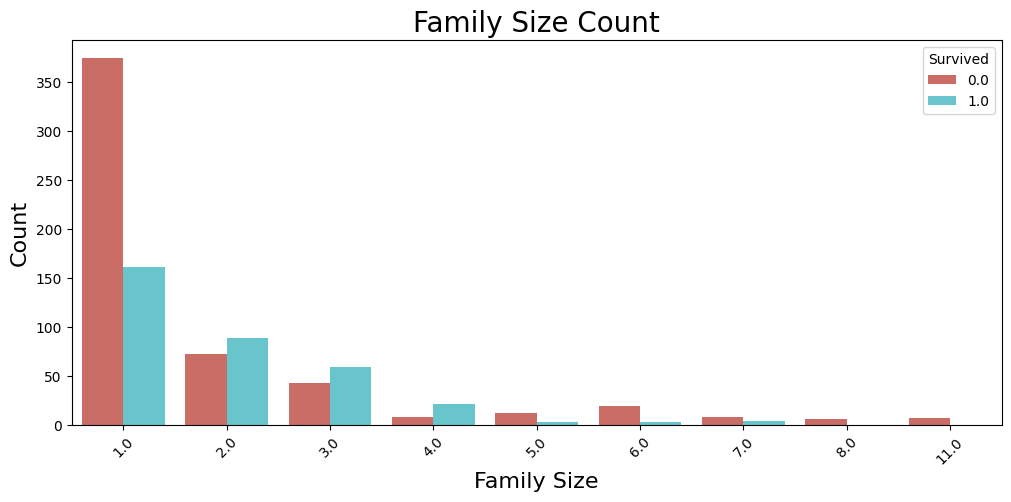

In [ ]:
# Kolom family dari 'SibSp' dan 'Parch'
df['FamilySz'] = df['SibSp'] + df['Parch'] + 1
# Defining the figure size of our graphic
plt.figure(figsize = (12, 5))

#Plotting the result
sns.countplot(data = df, x = 'FamilySz', hue = 'Survived', palette = 'hls')
plt.xlabel('Family Size', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title("Family Size Count", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

Survived  0.0  1.0
FamilySz          
1.0       374  161
2.0        72   89
3.0        43   59
4.0         8   21
5.0        12    3
6.0        19    3
7.0         8    4
8.0         6    0
11.0        7    0


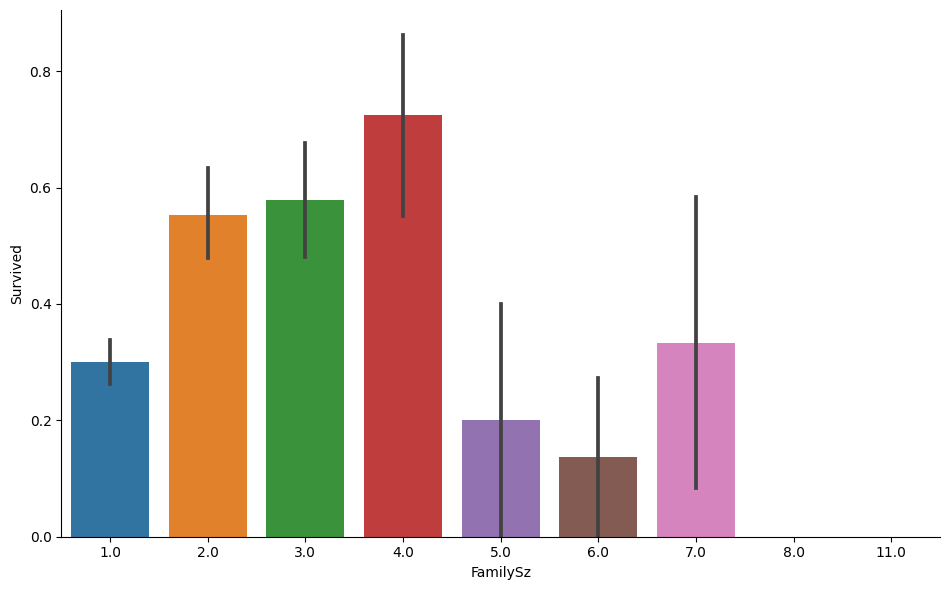

In [ ]:
print(pd.crosstab(df.FamilySz, df.Survived))
sns.catplot(x="FamilySz", y="Survived", data=df, kind="bar", height=6, aspect=1.6)
plt.show()


In [ ]:
#menggabungkan data keluarga menjadi 1 variabel 'Family Size'
#df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
#df[['Name','SibSp','Parch','FamilySize']]

In [ ]:
del df["SibSp"]
del df["Parch"]

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,Age_cat,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySz
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,Mr,Student,quart_1,0.0,1.0,0.0,0.0,1.0,2.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,Mrs,Adult,quart_4,1.0,0.0,1.0,0.0,0.0,2.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,Miss,Young,quart_1,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,Mrs,Young,quart_4,1.0,0.0,0.0,0.0,1.0,2.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,Mr,Young,quart_2,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,NaN,Miss,Young,quart_3,1.0,0.0,0.0,1.0,0.0,4.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C148,Mr,Young,quart_3,0.0,1.0,NaN,NaN,NaN,1.0
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",32.0,370376,7.7500,NaN,Mr,Young,quart_1,0.0,1.0,NaN,NaN,NaN,1.0
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN


# **Survived**

In [ ]:
pd.unique(df.Survived)

array([ 0.,  1., nan])

In [ ]:
df.dropna(axis=0, subset=["Survived"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    float64 
 1   Survived     889 non-null    float64 
 2   Pclass       889 non-null    float64 
 3   Name         889 non-null    object  
 4   Age          889 non-null    float64 
 5   Ticket       889 non-null    object  
 6   Fare         889 non-null    float64 
 7   Cabin        202 non-null    object  
 8   Title        888 non-null    object  
 9   Age_cat      889 non-null    category
 10  Fare_cat     889 non-null    category
 11  Sex_female   889 non-null    float64 
 12  Sex_male     889 non-null    float64 
 13  Embarked_C   887 non-null    float64 
 14  Embarked_Q   887 non-null    float64 
 15  Embarked_S   887 non-null    float64 
 16  FamilySz     889 non-null    float64 
dtypes: category(2), float64(11), object(4)
memory usage: 113.4+ KB


# **Cabin**

In [ ]:
#melihat data UNIK pada fitur 'Cabin'
df['Cabin'].unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [ ]:
print('Training Data')
print('Sebelum dibersihkan:', df['Cabin'].shape)
cabins = df['Cabin'].dropna()

print("Setelah dibersihkan:", cabins.shape)
print()

#print('Testing Data')
#print('Sebelum dibersihkan:', titanic_test['Cabin'].shape)
#cabins_test = titanic_test['Cabin'].dropna()

#print("Setelah dibersihkan:", cabins_test.shape)

Training Data
Sebelum dibersihkan: (889,)
Setelah dibersihkan: (202,)



In [ ]:
def cabin_1(x):
    return x[0]

cabins = cabins.apply(cabin_1)
#cabins_test = cabins_test.apply(cabin_1)
print(cabins[:10])
#print(cabins_test[:10])

1     C
3     C
6     E
10    G
11    C
21    D
23    A
27    C
31    B
52    D
Name: Cabin, dtype: object


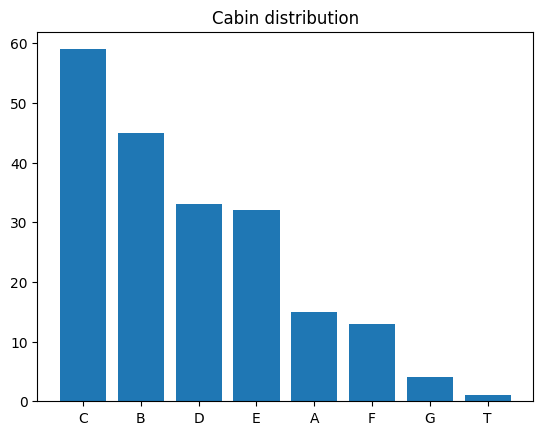

In [ ]:
cabins_count = cabins.value_counts()

plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

In [ ]:
df.groupby('Cabin')['Survived'].value_counts(normalize = True).mul(100).rename('Percentage').sort_index()


Cabin  Survived
A10    0.0         100.0
A14    0.0         100.0
A16    1.0         100.0
A19    0.0         100.0
A20    1.0         100.0
                   ...  
F38    0.0         100.0
F4     1.0         100.0
G6     0.0          50.0
       1.0          50.0
T      0.0         100.0
Name: Percentage, Length: 162, dtype: float64

In [ ]:
df['Cabin'] = df['Cabin'].fillna('U')
df[['Name', 'Cabin']]

,Name,Cabin
0,"Braund, Mr. Owen Harris",U
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",U
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",U
...,...,...
886,"Montvila, Rev. Juozas",U
887,"Graham, Miss. Margaret Edith",B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",U
889,"Behr, Mr. Karl Howell",C148


In [ ]:
def cabin_2(x):
    return x[0]

df['Cabin'] = df['Cabin'].apply(cabin_2)
print(df[['Name', 'Cabin']])

#titanic_test['Cabin'] = titanic_test['Cabin'].apply(cabin_2)
#print(titanic_test[['Name', 'Cabin']])



                                                  Name Cabin
0                              Braund, Mr. Owen Harris     U
1    Cumings, Mrs. John Bradley (Florence Briggs Th...     C
2                               Heikkinen, Miss. Laina     U
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)     C
4                             Allen, Mr. William Henry     U
..                                                 ...   ...
886                              Montvila, Rev. Juozas     U
887                       Graham, Miss. Margaret Edith     B
888           Johnston, Miss. Catherine Helen "Carrie"     U
889                              Behr, Mr. Karl Howell     C
890                                Dooley, Mr. Patrick     U

[889 rows x 2 columns]


In [ ]:
df.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
cabin_remap = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6, "G":7, "T":8, "U":9}
#test_cabin_remap = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6, "G":7, "T":8, "U":9}
df['Cabin'] = df['Cabin'].map(cabin_remap)
#titanic_test['Cabin'] = titanic_test['Cabin'].map(test_cabin_remap)

In [ ]:
print(df['Cabin'])
#print(titanic_test['Cabin'])

0      9
1      3
2      9
3      3
4      9
      ..
886    9
887    2
888    9
889    3
890    9
Name: Cabin, Length: 889, dtype: int64


# **Seleksi Data**

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,Age_cat,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySz
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,211536,13.00,9,Officer,Young,quart_2,0.0,1.0,0.0,0.0,1.0,1.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,112053,30.00,2,Miss,Student,quart_3,1.0,0.0,1.0,0.0,0.0,1.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.45,9,Miss,Young,quart_3,1.0,0.0,0.0,1.0,0.0,4.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",26.0,111369,30.00,3,Mr,Young,quart_3,0.0,1.0,NaN,NaN,NaN,1.0
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",32.0,370376,7.75,9,Mr,Young,quart_1,0.0,1.0,NaN,NaN,NaN,1.0


In [ ]:
df.drop([889,890], inplace=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,Age_cat,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySz
884,885.0,0.0,3.0,"Sutehall, Mr. Henry Jr",25.0,SOTON/OQ 392076,7.050,9,Mr,Student,quart_1,0.0,1.0,0.0,0.0,1.0,1.0
885,886.0,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",39.0,382652,29.125,9,Mrs,Adult,quart_3,1.0,0.0,0.0,0.0,1.0,6.0
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,211536,13.000,9,Officer,Young,quart_2,0.0,1.0,0.0,0.0,1.0,1.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,112053,30.000,2,Miss,Student,quart_3,1.0,0.0,1.0,0.0,0.0,1.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.450,9,Miss,Young,quart_3,1.0,0.0,0.0,1.0,0.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  887 non-null    float64 
 1   Survived     887 non-null    float64 
 2   Pclass       887 non-null    float64 
 3   Name         887 non-null    object  
 4   Age          887 non-null    float64 
 5   Ticket       887 non-null    object  
 6   Fare         887 non-null    float64 
 7   Cabin        887 non-null    int64   
 8   Title        886 non-null    object  
 9   Age_cat      887 non-null    category
 10  Fare_cat     887 non-null    category
 11  Sex_female   887 non-null    float64 
 12  Sex_male     887 non-null    float64 
 13  Embarked_C   887 non-null    float64 
 14  Embarked_Q   887 non-null    float64 
 15  Embarked_S   887 non-null    float64 
 16  FamilySz     887 non-null    float64 
dtypes: category(2), float64(11), int64(1), object(3)
memory usage: 113.2+ KB


In [ ]:
mean_age = df['Age'].mean()
mean_fare = df['Fare'].mean()

df['Age'].fillna(mean_age, inplace=True)
df['Fare'].fillna(mean_fare, inplace=True)

# **Seleksi Data 1**

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Title,Age_cat,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySz
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,9,Mr,Student,quart_1,0.0,1.0,0.0,0.0,1.0,2.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,3,Mrs,Adult,quart_4,1.0,0.0,1.0,0.0,0.0,2.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,9,Miss,Young,quart_1,1.0,0.0,0.0,0.0,1.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,3,Mrs,Young,quart_4,1.0,0.0,0.0,0.0,1.0,2.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,373450,8.0500,9,Mr,Young,quart_2,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885.0,0.0,3.0,"Sutehall, Mr. Henry Jr",25.0,SOTON/OQ 392076,7.0500,9,Mr,Student,quart_1,0.0,1.0,0.0,0.0,1.0,1.0
885,886.0,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",39.0,382652,29.1250,9,Mrs,Adult,quart_3,1.0,0.0,0.0,0.0,1.0,6.0
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",27.0,211536,13.0000,9,Officer,Young,quart_2,0.0,1.0,0.0,0.0,1.0,1.0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,2,Miss,Student,quart_3,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df.drop(['PassengerId', 'Cabin', 'Ticket'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    float64 
 1   Pclass      887 non-null    float64 
 2   Name        887 non-null    object  
 3   Age         887 non-null    float64 
 4   Fare        887 non-null    float64 
 5   Title       886 non-null    object  
 6   Age_cat     887 non-null    category
 7   Fare_cat    887 non-null    category
 8   Sex_female  887 non-null    float64 
 9   Sex_male    887 non-null    float64 
 10  Embarked_C  887 non-null    float64 
 11  Embarked_Q  887 non-null    float64 
 12  Embarked_S  887 non-null    float64 
 13  FamilySz    887 non-null    float64 
dtypes: category(2), float64(10), object(2)
memory usage: 92.4+ KB


In [ ]:
df.sample(3)

,Survived,Pclass,Name,Age,Fare,Title,Age_cat,Fare_cat,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySz
804,1.0,3.0,"Hedman, Mr. Oskar Arvid",27.0,6.9750,Mr,Young,quart_1,0.0,1.0,0.0,0.0,1.0,1.0
729,0.0,3.0,"Ilmakangas, Miss. Pieta Sofia",25.0,7.9250,Miss,Student,quart_1,1.0,0.0,0.0,0.0,1.0,2.0
702,0.0,3.0,"Barbara, Miss. Saiide",18.0,14.4542,Miss,Teen,quart_2,1.0,0.0,0.0,1.0,0.0,2.0


# **Drop Outlier(Opsional)**

In [ ]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df.Age < (Q1 - 1.5 * IQR)) | (df.Age > (Q3 +1.5 *IQR)))]
print(df.shape)
print(df1.shape)

(891, 13)
(825, 13)


In [ ]:
Q1 = df1.Fare.quantile(0.25)
Q3 = df1.Fare.quantile(0.75)
IQR = Q3 - Q1
df2 = df1[~((df1.Fare < (Q1 - 1.5 * IQR)) | (df1.Fare > (Q3 + 1.5 * IQR)))]
print(df1.shape)
print(df2.shape)

(825, 13)
(718, 13)


In [ ]:
print('Training Data')
print('Sebelum drop :', df2.shape)
df3 = df2.dropna(subset=['Embarked'])
print('Setelah drop :', df1.shape)
print()

#print('Testing Data')
#print('Sebelum drop :', titanic_test.shape)
#titanic_test = titanic_test.dropna(subset=['Embarked'])
#print('Setelah drop :', titanic_test.shape)
#print()

Training Data
Sebelum drop : (718, 13)
Setelah drop : (825, 13)



In [ ]:
#embarked_one_hot = pd.get_dummies(df3['Embarked'], prefix='Embarked')
#df4 = pd.concat([df3, embarked_one_hot], axis=1)

In [ ]:
#df4[['Name', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Name,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,"Braund, Mr. Owen Harris",S,0,0,1
2,"Heikkinen, Miss. Laina",S,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,0,0,1
4,"Allen, Mr. William Henry",S,0,0,1
5,"Moran, Mr. James",Q,0,1,0


In [ ]:
#test_embarked_one_hot = pd.get_dummies(titanic_test['Embarked'], prefix='Embarked')
#titanic_test = pd.concat([titanic_test, test_embarked_one_hot], axis=1)

In [ ]:
#titanic_test[['Name', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

In [ ]:
#Hapus EMBARKED

#titanic = df4.drop('Embarked', axis=1)
#titanic_test = titanic_test.drop('Embarked', axis=1)

In [ ]:
#df4.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                             Name     Sex        Age  SibSp  \
0                         Braund, Mr. Owen Harris    male  22.000000      1   
2                          Heikkinen, Miss. Laina  female  26.000000      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1   
4                        Allen, Mr. William Henry    male  35.000000      0   
5                                Moran, Mr. James    male  29.699118      0   
..                                   

In [ ]:
#titanic_test['Cabin'] = titanic_test['Cabin'].fillna('U')
#titanic_test[['Name', 'Cabin']]

In [ ]:
#Ekstrak gelar pada nama

#df4['gelar'] = df4.Name.str.extract('([A-Za-z]+)\.', expand = False)
#titanic_test['gelar'] = titanic_test.Name.str.extract('([A-Za-z]+)\.', expand = False)
#df4.drop('Name', axis = 1, inplace = True)
#titanic_test.drop('Name', axis = 1, inplace = True)

#print(df4.gelar.value_counts())
#print(titanic_test.gelar.value_counts())

Mr          452
Miss        132
Mrs          93
Master       23
Rev           5
Dr            5
Major         2
Don           1
Ms            1
Lady          1
Sir           1
Mlle          1
Jonkheer      1
Name: gelar, dtype: int64


In [ ]:
#pengelompokan gelar yang langka
#unimportant = [ 'Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Jonkheer', 'Mme', 'Lady', 'Capt', 'Don', 'Sir', 'the Countess','Ms']

#df4.gelar = df4.gelar.replace(unimportant, 'Rare')
#titanic_test.gelar = titanic_test.gelar.replace(unimportant, 'Rare')

In [ ]:
#konversi gelar ke bentuk integer
#gelar_remap = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#df4['gelar'] = df4['gelar'].map(gelar_remap)

#test_title_remap = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#titanic_test['gelar'] = titanic_test['gelar'].map(test_title_remap)

In [ ]:
#sex_one_hot = pd.get_dummies(df4['Sex'], prefix='Sex')
#df4 = pd.concat([df4, sex_one_hot], axis=1)

#remove initial sex column
#df5 = df4.drop('Sex', axis=1)

#df5.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'gelar', 'Sex_female', 'Sex_male'],
      dtype='object')

In [ ]:
#test_sex_one_hot = pd.get_dummies(titanic_test['Sex'], prefix='Sex')
#titanic_test = pd.concat([titanic_test, test_sex_one_hot], axis=1)

#remove initial sex column
#titanic_test = titanic_test.drop('Sex', axis=1)

#titanic_test.columns

# **Inisialisasi**

In [ ]:
#sc = StandardScaler()
#df = df.copy()
#df.iloc[:, 1:] = sc.fit_transform(df.iloc[:, 1:])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    887 non-null    float64 
 1   Pclass      887 non-null    float64 
 2   Name        887 non-null    object  
 3   Age         887 non-null    float64 
 4   Fare        887 non-null    float64 
 5   Title       886 non-null    object  
 6   Age_cat     887 non-null    category
 7   Fare_cat    887 non-null    category
 8   Sex_female  887 non-null    float64 
 9   Sex_male    887 non-null    float64 
 10  Embarked_C  887 non-null    float64 
 11  Embarked_Q  887 non-null    float64 
 12  Embarked_S  887 non-null    float64 
 13  FamilySz    887 non-null    float64 
dtypes: category(2), float64(10), object(2)
memory usage: 92.4+ KB


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'Fare', 'Title', 'Age_cat',
       'Fare_cat', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamilySz'],
      dtype='object')

In [ ]:
df.drop('Name', axis = 1, inplace = True)

In [ ]:
df = pd.get_dummies(df, columns=["Age_cat","Fare_cat","Title"],\
                          prefix=["Age","Fare","Prefix"], drop_first=True)

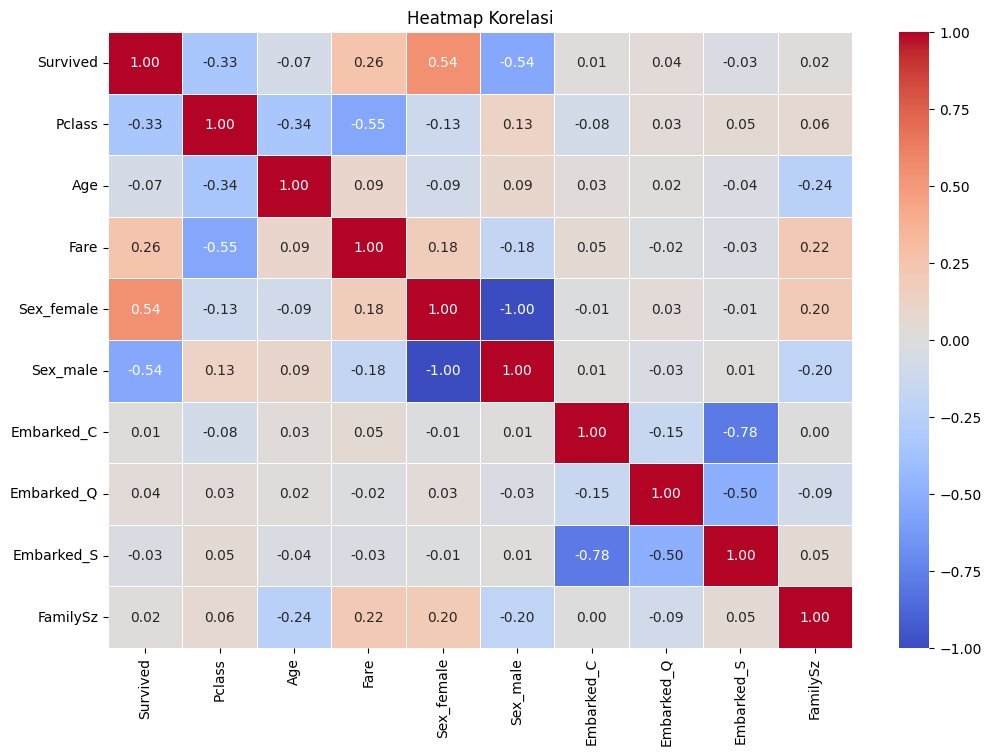

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Anda boleh menggantikan 'df' dengan DataFrame anda yang sebenar
heatmap_data = df.corr()  # Anda boleh menukar 'df' dengan DataFrame anda yang sebenar

# Menetapkan saiz plot
plt.figure(figsize=(12, 8))

# Mewarna heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menetapkan tajuk heatmap
plt.title('Heatmap Korelasi')

# Memaparkan plot
plt.show()


KeyError: ignored

# **X dan Y**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 888
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        887 non-null    float64
 1   Pclass          887 non-null    float64
 2   Age             887 non-null    float64
 3   Fare            887 non-null    float64
 4   Sex_female      887 non-null    float64
 5   Sex_male        887 non-null    float64
 6   Embarked_C      887 non-null    float64
 7   Embarked_Q      887 non-null    float64
 8   Embarked_S      887 non-null    float64
 9   FamilySz        887 non-null    float64
 10  Age_Children    887 non-null    uint8  
 11  Age_Teen        887 non-null    uint8  
 12  Age_Student     887 non-null    uint8  
 13  Age_Young       887 non-null    uint8  
 14  Age_Adult       887 non-null    uint8  
 15  Age_Senior      887 non-null    uint8  
 16  Fare_quart_1    887 non-null    uint8  
 17  Fare_quart_2    887 non-null    uin

In [ ]:
y = df["Survived"]
X = df.drop(["Survived"],axis=1)
#titanic_test = titanic_test.drop(['PassengerId', 'Ticket', 'gelar'], axis=1)

# **Normalisasi Data**

In [ ]:
from sklearn.feature_selection import chi2
fitur = chi2(X,y)
fitur

(array([2.96682677e+01, 2.45705919e+01, 4.44743896e+03, 1.69537822e+02,
        9.19926964e+01, 8.10036727e-02, 1.14950466e+00, 2.67185329e-01,
        4.19980957e-01, 5.21206640e-02, 6.37832550e-01, 1.63749112e+00,
        6.92991040e-01, 1.78028033e-01, 3.26873828e+00, 2.30475456e+01,
        8.55336572e+00, 6.34730171e+00, 3.54601036e+01, 7.80128683e+01,
        1.12238435e+02, 9.03442399e+01, 8.31033322e-01, 2.35132313e-01]),
 array([5.12672115e-08, 7.16366953e-07, 0.00000000e+00, 9.33494082e-39,
        8.69969658e-22, 7.75941844e-01, 2.83652866e-01, 6.05226157e-01,
        5.16946547e-01, 8.19413409e-01, 4.24496753e-01, 2.00670045e-01,
        4.05148877e-01, 6.73073424e-01, 7.06119120e-02, 1.58044139e-06,
        3.44883980e-03, 1.17559974e-02, 2.60328502e-09, 1.02371466e-18,
        3.16822533e-26, 2.00127412e-21, 3.61973903e-01, 6.27744135e-01]))

In [ ]:
chi2_statistic = fitur[0]
print(chi2_statistic)


[2.96682677e+01 2.45705919e+01 4.44743896e+03 1.69537822e+02
 9.19926964e+01 8.10036727e-02 1.14950466e+00 2.67185329e-01
 4.19980957e-01 5.21206640e-02 6.37832550e-01 1.63749112e+00
 6.92991040e-01 1.78028033e-01 3.26873828e+00 2.30475456e+01
 8.55336572e+00 6.34730171e+00 3.54601036e+01 7.80128683e+01
 1.12238435e+02 9.03442399e+01 8.31033322e-01 2.35132313e-01]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh data hasil chi-squared (ganti dengan nilai sesuai data Anda)
#chi2_statistic = [10.0, 20.0, 15.0, 5.0, 8.0, 30.0, 25.0, 12.0]
fitur_nama = ["Embarked_C","Embarked_Q","Embarked_S","Sex_female","Sex_male","Fare"]

# Buat DataFrame dari hasil chi-squared
chi2_df = pd.DataFrame({'Feature': fitur_nama, 'Chi-Squared': chi2_statistic})

# Urutkan DataFrame berdasarkan nilai Chi-Squared
chi2_df = chi2_df.sort_values(by='Chi-Squared', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(chi2_df['Feature'], chi2_df['Chi-Squared'])
plt.xlabel('Chi-Squared Value')
plt.title('Chi-Squared Test Results')
plt.show()


ValueError: ignored

In [ ]:
#sc = StandardScaler()
#df = df.copy()
#df.iloc[:, 1:] = sc.fit_transform(df.iloc[:, 1:])

In [ ]:
#sc = StandardScaler()
#df4.iloc[:, 1:] = sc.fit_transform(df4.iloc[:, 1:])

# **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X1 = X
Y1 = y
best_random_state = None
best_accuracy = 0

# Uji berbagai nilai random_state
for random_state in range(1000):
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=random_state)
    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(X1_train, Y1_train)
    Y1_pred = dt.predict(X1_test)
    accuracy = accuracy_score(Y1_test, Y1_pred) * 100

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {best_accuracy}%")


Best Random State: 66
Best Accuracy: 84.8314606741573%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Bagi dataset menjadi data latih dan data uji
X4 = X
y4 = y
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=66)

dt = DecisionTreeClassifier()
dt.fit(X4_train, y4_train)

dt_accuracy = dt.score(X4_test, y4_test)
print("Accuracy:", dt_accuracy*100)


Accuracy: 84.8314606741573


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y4_pred = dt.predict(X4_test)
print('\nconfusion matrix')
cm4 = confusion_matrix(y4_test, y4_pred)
print(cm4)
print('\naccuracy')
print(accuracy_score(y4_test, y4_pred)*100)
print('\nclassification report')
print(classification_report(y4_test, y4_pred))



confusion matrix
[[90 14]
 [13 61]]

accuracy
84.8314606741573

classification report
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       104
         1.0       0.81      0.82      0.82        74

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
from sklearn.metrics import auc, precision_recall_curve

# Menghitung nilai precision dan recall
precision, recall, _ = precision_recall_curve(y4_test, y4_pred)

# Menghitung AUC-PR
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr*100)


AUC-PR: 85.53456827614131


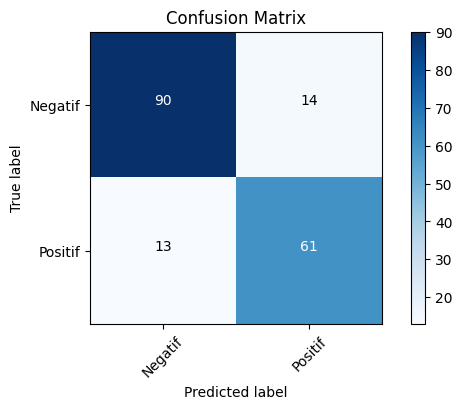

In [ ]:
import itertools
confusion_matrix = cm4

# Definisikan label kelas
class_names = ['Negatif', 'Positif']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Tambahkan label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Tampilkan nilai di dalam sel
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

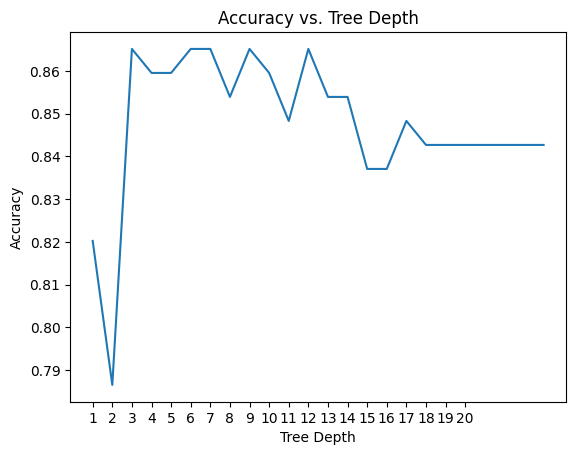

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi list untuk menyimpan akurasi pada berbagai kedalaman pohon
depths = list(range(1, 25))  # Misalnya, coba kedalaman dari 1 hingga 20
accuracies = []

# Melatih model Decision Tree pada berbagai kedalaman pohon
for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=66)
    dt_model.fit(X4_train, y4_train)
    accuracy = dt_model.score(X4_test, y4_test)
    accuracies.append(accuracy)

# Menampilkan grafik perubahan akurasi dengan kedalaman pohon
plt.plot(depths, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.title('Accuracy vs. Tree Depth')
plt.xticks(np.arange(1, 21, 1))  # Label sumbu x dari 1 hingga 20
plt.show()

# **KNN Pred**

NameError: ignored

# **KNN Model**

In [ ]:
X = df7.iloc[:, 1:].values
y = df7.iloc[:, 0].values

In [ ]:
# Splitting into the training set and test setfrom sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)*100

[[96 18]
 [25 41]]


76.11111111111111

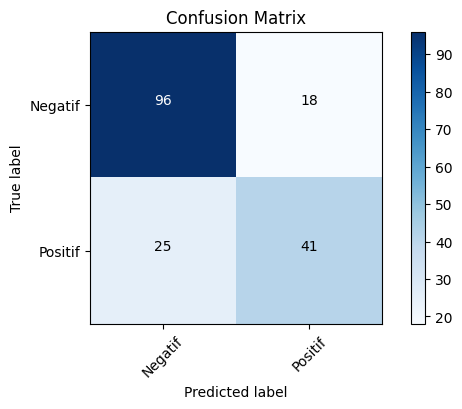

In [ ]:
import itertools
confusion_matrix = cm1

# Definisikan label kelas
class_names = ['Negatif', 'Positif']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Tambahkan label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Tampilkan nilai di dalam sel
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Perbandingan Data Asli dan Hasil Prediksi
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]

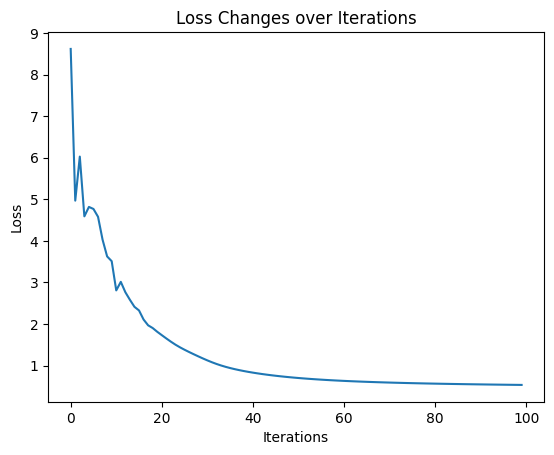

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss  # Mengimpor log_loss
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi model SGDClassifier (logistic regression)
sgd = SGDClassifier(loss='log', max_iter=100, random_state=42)

# Menyiapkan list untuk menyimpan loss pada setiap iterasi
losses = []

# Pelatihan model dan mengukur loss pada setiap iterasi
for iteration in range(100):  # Anda dapat menyesuaikan jumlah iterasi sesuai kebutuhan
    sgd.partial_fit(X, y, classes=[0, 1])
    loss = log_loss(y, sgd.predict_proba(X)[:, 1])
    losses.append(loss)

# Menampilkan grafik perubahan loss
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss Changes over Iterations')
plt.show()

# **LR Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X1 = X
Y1 = y
best_random_state = None
best_accuracy = 0

# Uji berbagai nilai random_state
for random_state in range(1000):
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=random_state)
    lr = LogisticRegression(random_state=0)
    lr.fit(X1_train, Y1_train)
    Y1_pred = lr.predict(X1_test)
    accuracy = accuracy_score(Y1_test, Y1_pred) * 100

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {best_accuracy}%")


Best Random State: 829
Best Accuracy: 87.64044943820225%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
X1 = X
Y1 = y
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 829)
lr = LogisticRegression(random_state=307)
l = lr.fit(X1_train,Y1_train)
l.score(X1_train,Y1_train)*100

79.19354838709678

In [ ]:
Y1_pred = lr.predict(X1_test)
accuracy_score(Y1_test, Y1_pred)*100

87.64044943820225

In [ ]:
from sklearn.metrics import log_loss

Y1_pred_proba = lr.predict_proba(X1_test)
logloss = log_loss(Y1_test, Y1_pred_proba)  # Menghitung log loss
print(f"Log Loss: {logloss:.3f}")

Log Loss: 0.354


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
cm2 = confusion_matrix(Y1_test, Y1_pred)
print(confusion_matrix(Y1_test, Y1_pred))
print('\naccuracy')
print(accuracy_score(Y1_test, Y1_pred)*100)
print('\nclassification report')
print(classification_report(Y1_test, Y1_pred))


confusion matrix
[[156  17]
 [ 16  78]]

accuracy
87.64044943820225

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       173
         1.0       0.82      0.83      0.83        94

    accuracy                           0.88       267
   macro avg       0.86      0.87      0.86       267
weighted avg       0.88      0.88      0.88       267



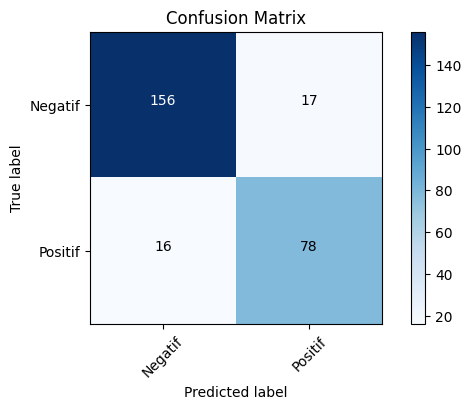

In [ ]:
import itertools
confusion_matrix = cm2

# Definisikan label kelas
class_names = ['Negatif', 'Positif']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Tambahkan label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Tampilkan nilai di dalam sel
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import numpy as np

# Mengubah Y1_test dan Y1_pred ke dalam bentuk numpy array
Y1_test = np.array(Y1_test)
Y1_pred = np.array(Y1_pred)

# Kemudian, anda boleh menggunakan fungsi reshape
pred_arr = np.concatenate((Y1_test.reshape(len(Y1_test), 1), Y1_pred.reshape(len(Y1_pred), 1)), 1)
print(pred_arr)


[[1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 

In [ ]:
pred_arr.shape

(267, 2)

In [ ]:
pred_df = pd.DataFrame({'Actual Value': Y1_test, 'Predicted Value': Y1_pred})
pred_df

,Actual Value,Predicted Value
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
262,1.0,1.0
263,0.0,0.0
264,0.0,0.0
265,0.0,0.0


In [ ]:
# Menghitung jumlah data yang berbeda antara kolom "Actual Value" dan "Predicted Value"
different_values_count = (pred_df['Actual Value'] != pred_df['Predicted Value']).sum()

print("Jumlah data di mana 'Actual Value' berbeda dari 'Predicted Value':", different_values_count)


Jumlah data di mana 'Actual Value' berbeda dari 'Predicted Value': 33


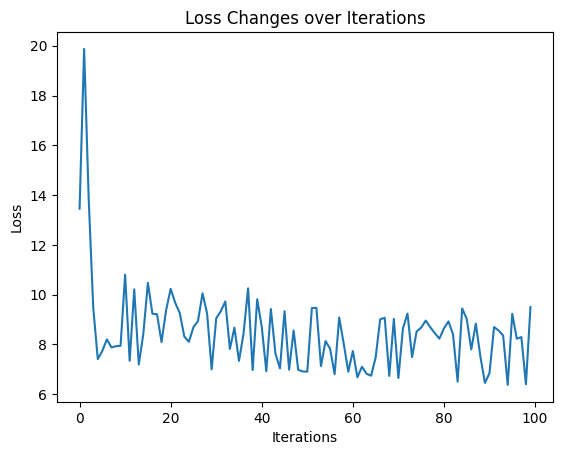

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss  # Mengimpor log_loss
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi model SGDClassifier (logistic regression)
sgd = SGDClassifier(loss='log', max_iter=100, random_state=829)

# Menyiapkan list untuk menyimpan loss pada setiap iterasi
losses = []

# Pelatihan model dan mengukur loss pada setiap iterasi
for iteration in range(100):  # Anda dapat menyesuaikan jumlah iterasi sesuai kebutuhan
    sgd.partial_fit(X1, Y1, classes=[0, 1])
    loss = log_loss(Y1, sgd.predict_proba(X1)[:, 1])
    losses.append(loss)

# Menampilkan grafik perubahan loss
plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss Changes over Iterations')
plt.show()

# **Predict_MLP**

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pisahkan kolom target dan fitur-fitur

# Bagi dataset menjadi data pelatihan dan data ujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301)

# Tentukan daftar nilai random_state yang ingin diuji dari 1 hingga 1000
random_states = list(range(1, 500))

best_random_state = None
best_accuracy = 0

# Inisialisasi MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Skala ulang fitur-fitur
X_train_scaled = scaler.fit_transform(X_train)

# Lakukan cross-validation dengan berbagai random_state
for random_state in random_states:
    mlp.set_params(random_state=random_state)
    accuracy_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(accuracy_scores)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_random_state = random_state

print("Kombinasi Random State Terbaik:", best_random_state)
print("Akurasi Terbaik:", best_accuracy)


# **MLPClassifier**

In [ ]:
X2 = X
y2 = y

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.3, random_state=153)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2_train)
scaler.fit(X2_test)

StandardScaler()

In [ ]:
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

In [ ]:
mlp.fit(X2_train, y2_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [ ]:
predic = mlp.predict(X2_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y2_test, predic)
print('Accuracy: ',accuracy *100)

Accuracy:  80.89887640449437


In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y2_test,predic)
print(confusion_matrix(y2_test,predic))

[[150  21]
 [ 30  66]]


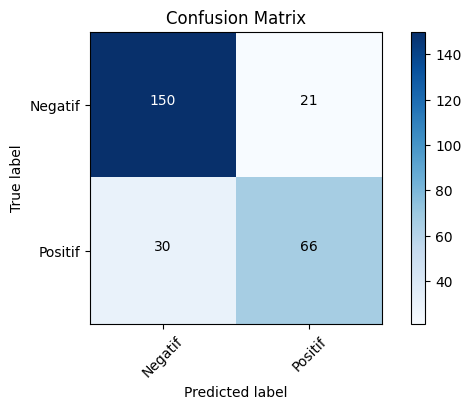

In [ ]:
import itertools
confusion_matrix = cm3

# Definisikan label kelas
class_names = ['Negatif', 'Positif']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Tambahkan label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Tampilkan nilai di dalam sel
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,predic))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       171
         1.0       0.76      0.69      0.72        96

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



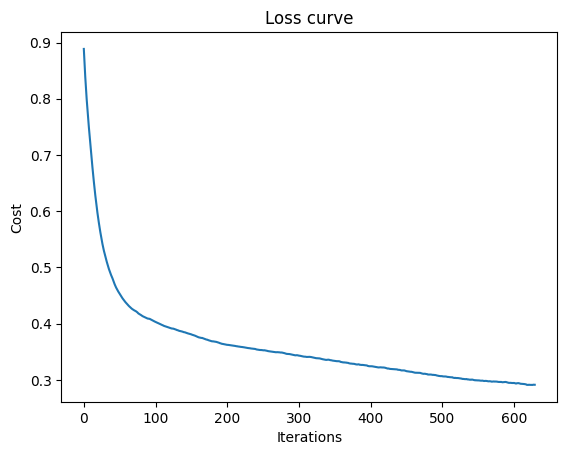

In [ ]:
plt.plot(mlp.loss_curve_)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Loss curve')
plt.show()

# **10-Fold CV**

                 Model  Train Error  \
0  Logistic Regression     0.218603   
1        Decision Tree     0.219973   
2       MLP Classifier     0.200430   

                                   10-fold CV Scores  
0  [0.8055555555555556, 0.75, 0.7638888888888888,...  
1  [0.75, 0.7638888888888888, 0.7638888888888888,...  
2  [0.7916666666666666, 0.75, 0.7638888888888888,...  


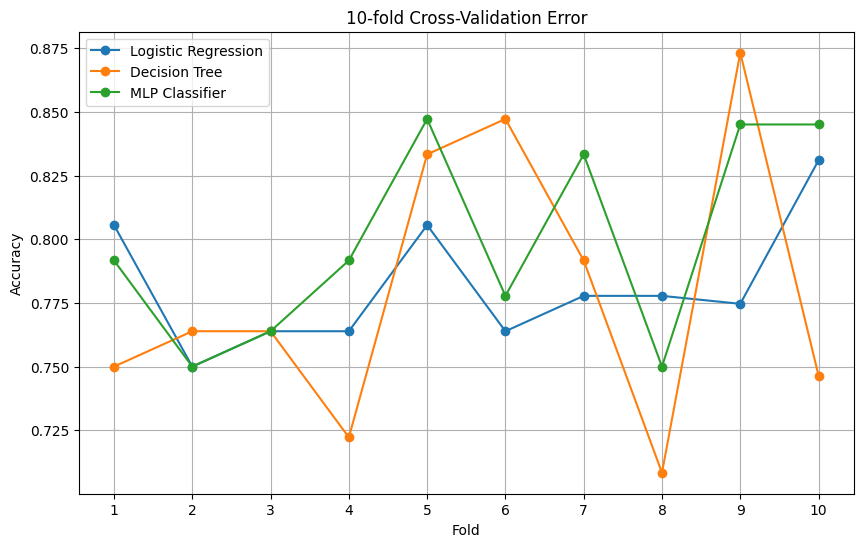

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset Titanic (ganti dengan dataset sesuai kebutuhan)
# Misalnya, Anda dapat menggunakan dataset dari Scikit-Learn
from sklearn.datasets import load_iris
# data = load_iris()
X = df7.iloc[:, 1:].values
y = df7.iloc[:, 0].values

# Inisialisasi model Regresi Logistik, Pohon Keputusan, dan MLP Classifier
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("MLP Classifier", MLPClassifier())
]

results = []

# Melakukan 10-fold cross-validation untuk setiap model
for model_name, model in models:
    scores = cross_val_score(model, X, y, cv=10)
    train_error = 1 - np.mean(scores)
    results.append([model_name, train_error, scores])

# Membuat DataFrame dari hasil cross-validation
df = pd.DataFrame(results, columns=["Model", "Train Error", "10-fold CV Scores"])

# Menampilkan tabel hasil cross-validation
print(df)

# Membuat plot untuk leveling 10-fold CV Error
plt.figure(figsize=(10, 6))
for model_name, _, scores in results:
    plt.plot(range(1, 11), scores, marker='o', label=model_name)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-fold Cross-Validation Error')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()
